# Level 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")

print("Shape:", df.shape)  
df.info()  
df.head()

Shape: (9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Swi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task 1

In [2]:
#  Clean and extract relevant columns
df_clean = df[['Has Table booking', 'Has Online delivery', 'Aggregate rating', 'Price range']].copy()

df_clean['Has Table booking'] = df_clean['Has Table booking'].str.strip().str.lower()
df_clean['Has Online delivery'] = df_clean['Has Online delivery'].str.strip().str.lower()
df_clean.head()

,Has Table booking,Has Online delivery,Aggregate rating,Price range
0,yes,no,4.8,3
1,yes,no,4.5,3
2,yes,no,4.4,4
3,no,no,4.9,4
4,yes,no,4.8,4


## Table Booking & Online Delivery Percentages

### Calculate Percentages

In [3]:
table_booking_percent = (df_clean['Has Table booking'] == 'yes').mean() * 100
online_delivery_percent = (df_clean['Has Online delivery'] == 'yes').mean() * 100

print(f"Percentage of restaurants with table booking: {table_booking_percent:.2f}%")
print(f"Percentage of restaurants with online delivery: {online_delivery_percent:.2f}%")

Percentage of restaurants with table booking: 12.12%
Percentage of restaurants with online delivery: 25.66%


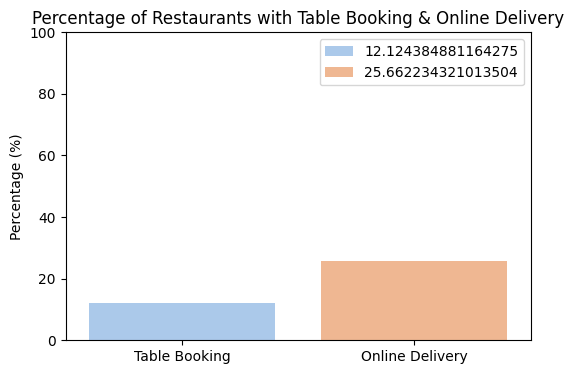

In [4]:
labels = ['Table Booking', 'Online Delivery']
values = [table_booking_percent, online_delivery_percent]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values, hue=values, palette='pastel')
plt.title('Percentage of Restaurants with Table Booking & Online Delivery')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

### Compare Average Ratings


In [5]:
avg_rating_with_booking = df_clean[df_clean['Has Table booking'] == 'yes']['Aggregate rating'].mean()
avg_rating_without_booking = df_clean[df_clean['Has Table booking'] == 'no']['Aggregate rating'].mean()

print(f"Average rating with table booking: {avg_rating_with_booking:.2f}")
print(f"Average rating without table booking: {avg_rating_without_booking:.2f}")

Average rating with table booking: 3.44
Average rating without table booking: 2.56


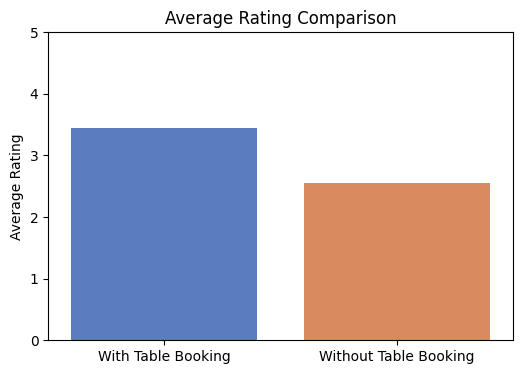

In [6]:
ratings = [avg_rating_with_booking, avg_rating_without_booking]
labels = ['With Table Booking', 'Without Table Booking']

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=ratings, hue=labels, palette='muted')
plt.title('Average Rating Comparison')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()

### Calculate Delivery Availability by Price Range

In [7]:
delivery_by_price = df_clean.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
delivery_by_price

Has Online delivery,no,yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


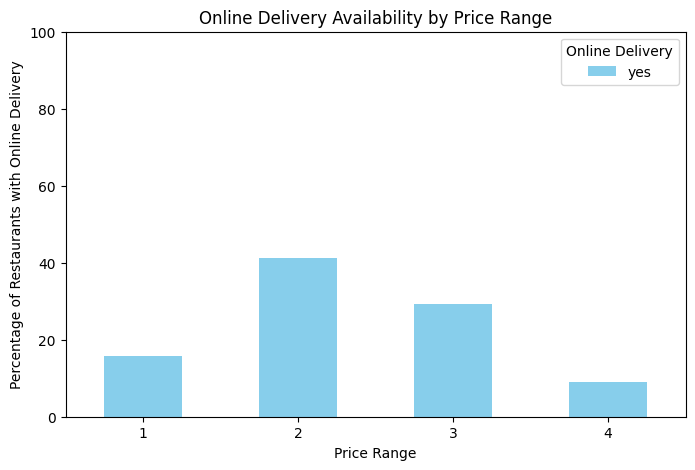

In [8]:
# Safely plot the 'yes' column
if 'yes' in delivery_by_price.columns:
    delivery_by_price[['yes']].plot(kind='bar', color='skyblue', figsize=(8, 5))
    plt.title('Online Delivery Availability by Price Range')
    plt.ylabel('Percentage of Restaurants with Online Delivery')
    plt.xlabel('Price Range')
    plt.xticks(rotation=0)
    plt.ylim(0, 100)
    plt.legend(title='Online Delivery')
    plt.show()
else:
    print("Column 'yes' not found in delivery_by_price. Available columns are:", delivery_by_price.columns)


## Task 2

### Most Common Price Range

In [9]:
# Create a cleaned version of df (remove rows with missing 'Aggregate rating')
df_clean = df[df['Aggregate rating'].notnull()]

In [10]:
most_common_price_range = df_clean['Price range'].mode()[0]
price_range_counts = df_clean['Price range'].value_counts()

print(f"Most common price range: {most_common_price_range}")
price_range_counts


Most common price range: 1


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

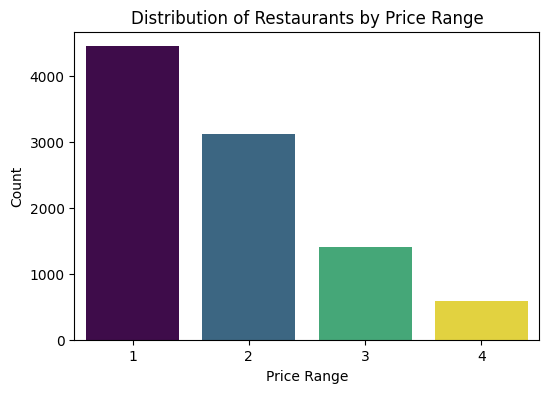

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Price range', data=df_clean, hue='Price range', palette='viridis', legend=False)
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


## Average Rating per Price Range

In [12]:
avg_rating_by_price = df_clean.groupby('Price range')['Aggregate rating'].mean().round(2)

print("Average rating for each price range:")
print(avg_rating_by_price)

Average rating for each price range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


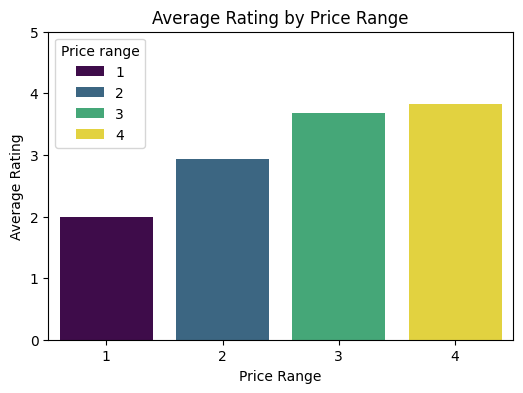

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, hue=avg_rating_by_price.index, palette='viridis')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()

In [14]:
# Use seaborn's 'viridis' palette to map colors
colors = sns.color_palette('viridis', len(avg_rating_by_price))
max_rating_index = avg_rating_by_price.idxmax()
max_rating_color = colors[list(avg_rating_by_price.index).index(max_rating_index)]

print(f"Price range with highest average rating: {max_rating_index}")
print(f"Color representing highest rating: RGB{tuple([round(c*255) for c in max_rating_color])}")


Price range with highest average rating: 4
Color representing highest rating: RGB(122, 209, 81)


## Task 3

### Extract Length-Based Features

In [15]:
# Create new features: name length and address length
df['Name Length'] = df['Restaurant Name'].astype(str).apply(len)
df['Address Length'] = df['Address'].astype(str).apply(len)

df[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head()


,Restaurant Name,Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


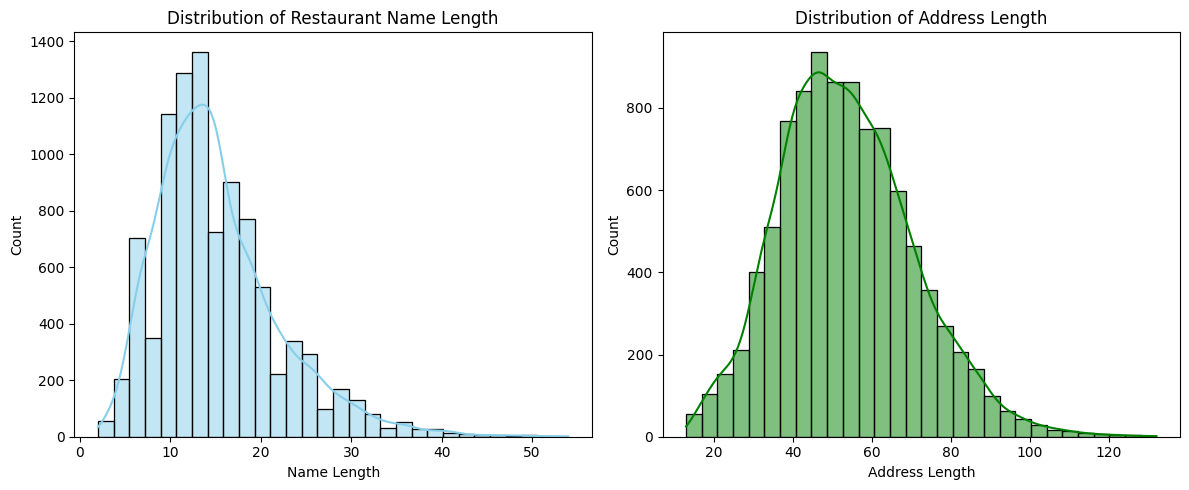

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Name Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Name Length')

plt.subplot(1, 2, 2)
sns.histplot(df['Address Length'], bins=30, kde=True, color='green')
plt.title('Distribution of Address Length')

plt.tight_layout()
plt.show()


### Encode Table Booking and Online Delivery

In [17]:
# Clean and encode
df['Has Table Booking (Encoded)'] = df['Has Table booking'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Has Online Delivery (Encoded)'] = df['Has Online delivery'].str.strip().str.lower().map({'yes': 1, 'no': 0})

df[['Has Table booking', 'Has Table Booking (Encoded)', 'Has Online delivery', 'Has Online Delivery (Encoded)']].head()

,Has Table booking,Has Table Booking (Encoded),Has Online delivery,Has Online Delivery (Encoded)
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0


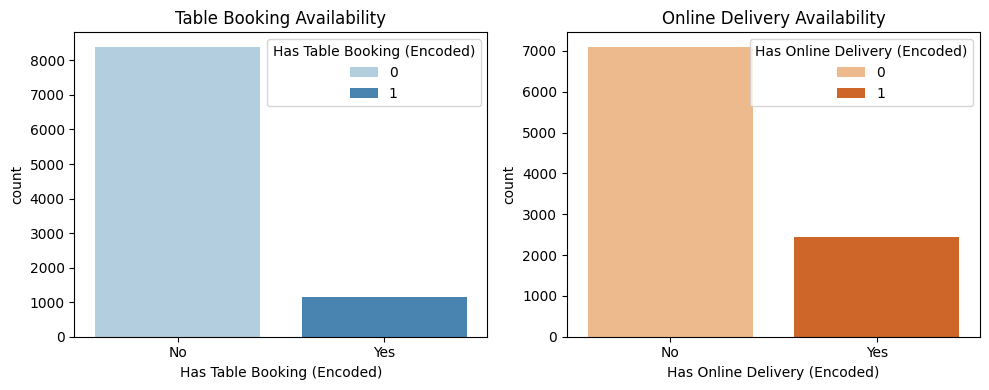

In [18]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Has Table Booking (Encoded)', data=df, hue='Has Table Booking (Encoded)', palette='Blues')
plt.title('Table Booking Availability')
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.countplot(x='Has Online Delivery (Encoded)', data=df, hue='Has Online Delivery (Encoded)', palette='Oranges')
plt.title('Online Delivery Availability')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()
